In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [107]:
fotos_rgb = dict()
fotos_gray = dict()

for i in range(1, 11):
    img = cv2.imread(f'fotos/img{i}.png')
    img = cv2.resize(img, (720, 720))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fotos_rgb["img" + str(i)] = img_rgb
    fotos_gray["img" + str(i)] = img_gray
    
fotos_rgb.keys(), fotos_gray.keys()

(dict_keys(['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9', 'img10']),
 dict_keys(['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9', 'img10']))

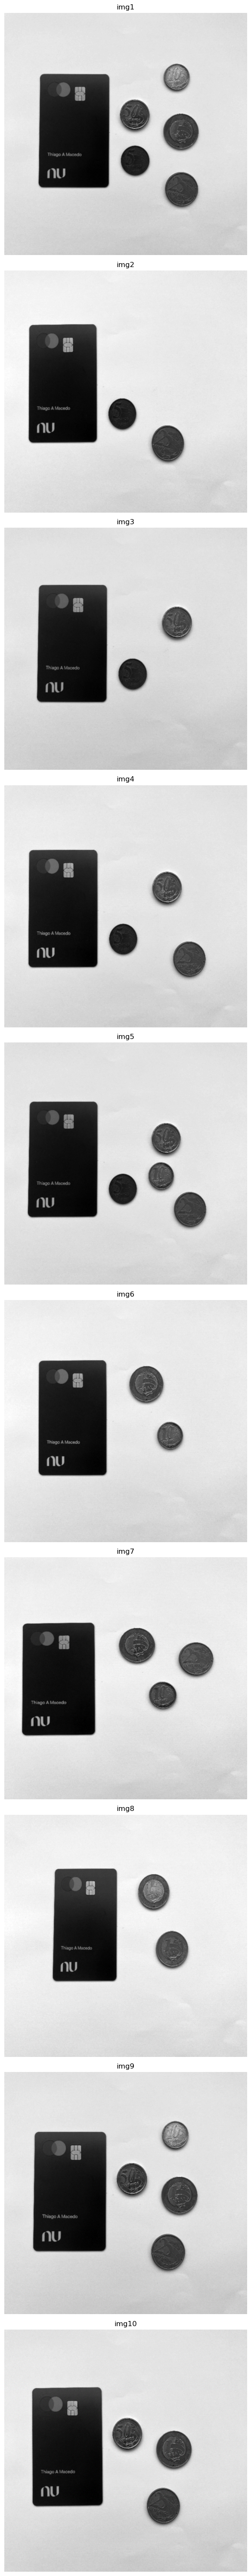

In [108]:
fig, axs = plt.subplots(nrows=len(fotos_gray), ncols=1, figsize=(6, 6*len(fotos_gray)))

for i, (key, value) in enumerate(fotos_gray.items()):
    axs[i].imshow(value, cmap="gray")
    axs[i].set_title(key)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

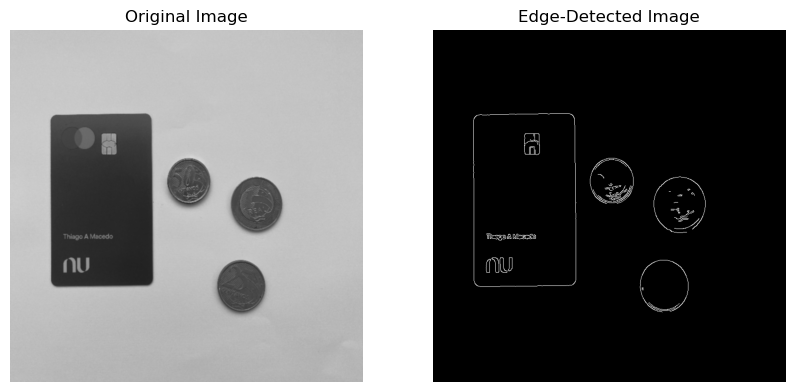

In [215]:
img = fotos_gray["img10"]

# Apply edge detection
edges = cv2.Canny(img, 120, 250)

# Plot the original image and the edge-detected image side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge-Detected Image')
axs[1].axis('off')

plt.show()

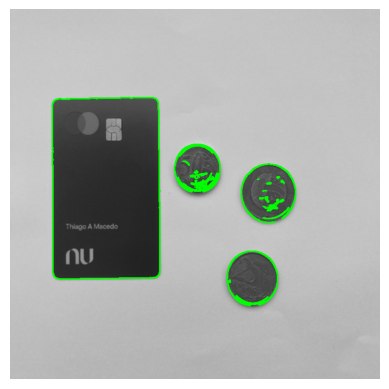

In [216]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
image_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours using Matplotlib
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

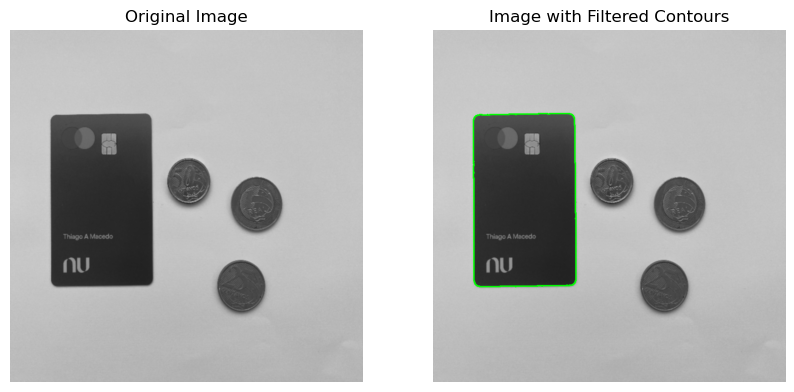

In [217]:
# Set a minimum and maximum size for the credit card and coins in the image
min_area = 10000
max_area = 695456

# Filter contours based on their area
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Create a copy of the original image for visualization
image_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Draw filtered contours on the image
cv2.drawContours(image_with_contours, filtered_contours, -1, (0, 255, 0), 2)

# Display the original image and the image with filtered contours side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(image_with_contours)
axs[1].set_title('Image with Filtered Contours')
axs[1].axis('off')

plt.show()

In [230]:
credit_card_real_size = (8.56, 5.398)  # Width and height in cm
credit_card_ratio = credit_card_real_size[0] / credit_card_real_size[1]
credit_card_ratio

1.5857725083364211

In [225]:
x, y, w, h = cv2.boundingRect(filtered_contours[0])
print(x, y, w, h)


82 172 210 354


In [ ]:
def is_credit_card(cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    return 0.9 < aspect_ratio / credit_card_ratio < 1.1



In [231]:
(h/w) / credit_card_ratio

1.0630240320427236